# Seaborn Homework - sns tutorial

[Pokemon tutorial](https://elitedatascience.com/python-seaborn-tutorial)

[Seaborn style tutorial](https://seaborn.pydata.org/tutorial/aesthetics.html)

## Importing libraries and dataset

In [1]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
# import numpy 
import numpy as np 
import scipy.stats as st
# don't show annying warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
df=pd.read_csv('data_pokemon.csv', encoding='latin1') 
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 1538: invalid start byte
# have to use the encoding as latin1 to read this file as there are some special character in this file

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Seaborn's plotting functions.

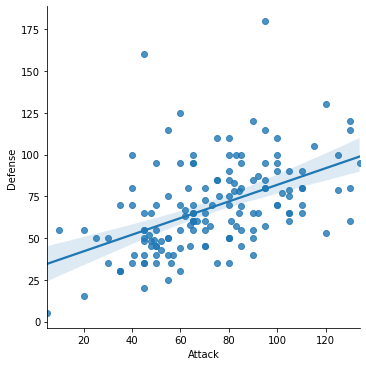

In [4]:
# making a scatter plot is just one line of code using the lmplot() function.
# Recommended way (use data=)
sns.lmplot(x='Attack', y='Defense', data=df)
#straightline = regression line
plt.savefig('snsregressionline')

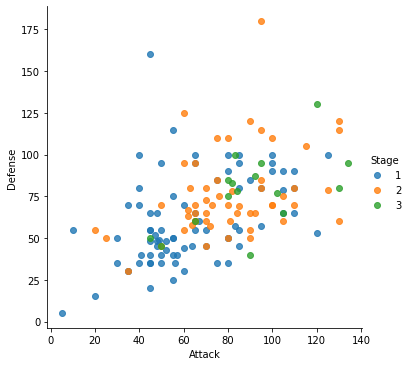

In [5]:
# Alternative way
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage - it allows you to express a third dimension of information using color

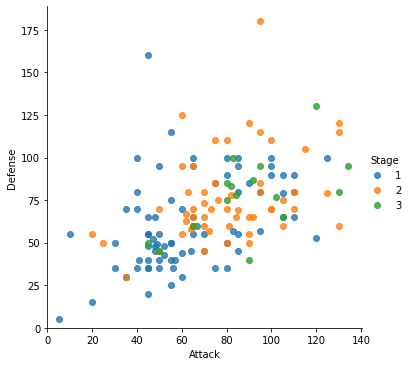

In [6]:
# new scatter plot with sensible axes limits
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

plt.savefig('snsscatterplot')

 ## The role of Pandas.

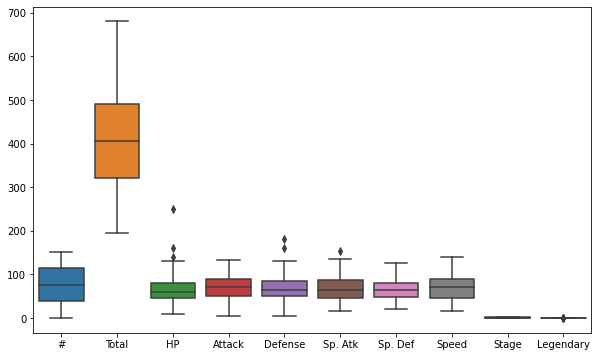

In [7]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Boxplot
sns.boxplot(data=df)

plt.savefig('snsboxplot')

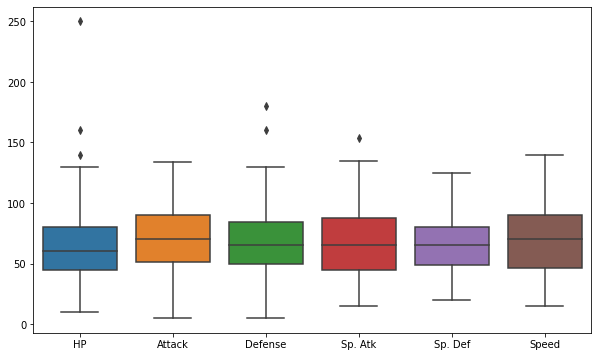

In [8]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Pre-format DataFrame
stats_df = df.drop(['#','Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

plt.savefig('snsboxplot2')

## Seaborn themes

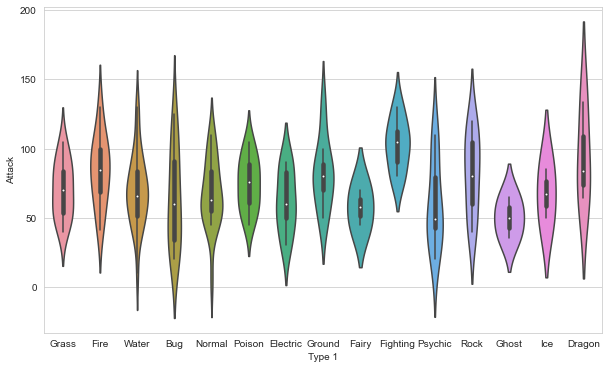

In [9]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

plt.savefig('snsviolinplot')

## Color palettes

In [10]:
# personalized palette
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

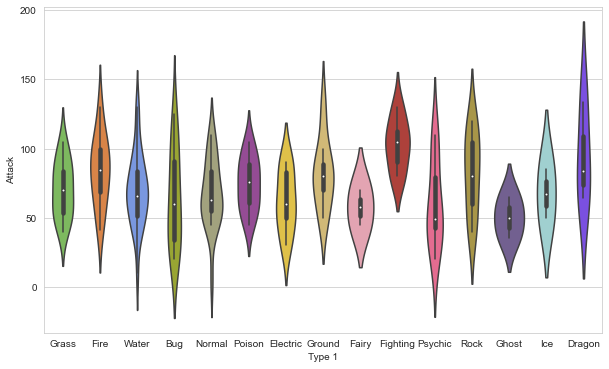

In [11]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette
plt.savefig('snsviolinplot2')

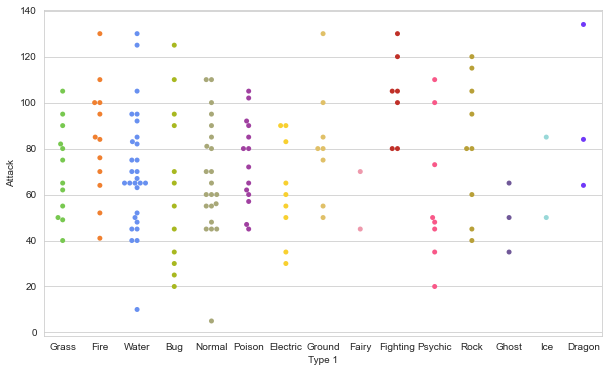

In [12]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)
plt.savefig('snsswarmplot')

## Overlaying plots

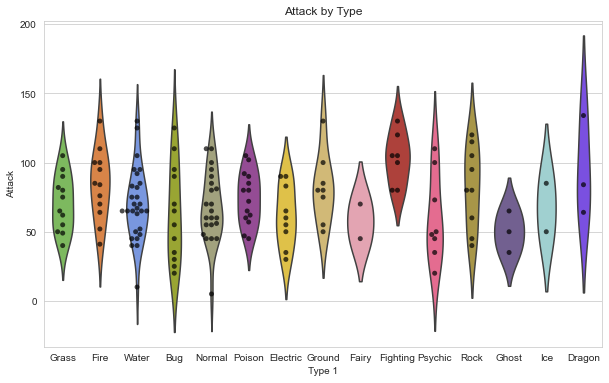

In [13]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

plt.savefig('snsviolinandswarmplot')

## Putting it all together

In [14]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,Charmander,Fire,NaN,39,52,43,60,50,65
4,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [15]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [16]:
print( stats_df.shape )
print( melted_df.shape )

(151, 9)
(906, 5)


<AxesSubplot:xlabel='Stat', ylabel='value'>

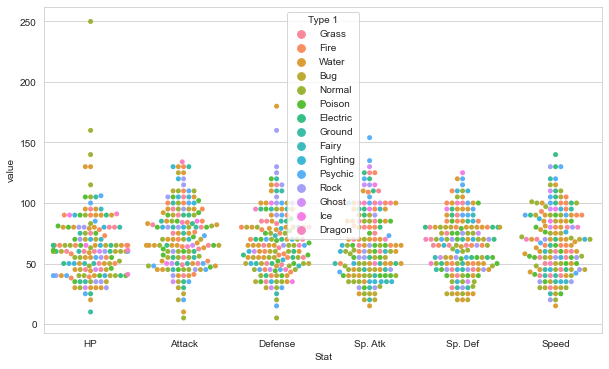

In [17]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

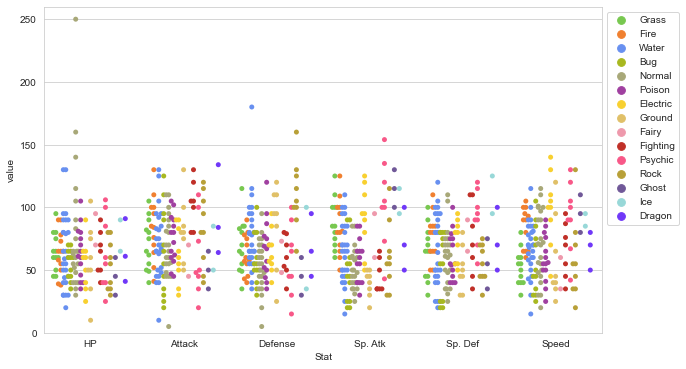

In [18]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.savefig('snsswarmplot2')

## Pokédex (mini-gallery)

### Heatmap
Heatmaps help you visualize matrix-like data.



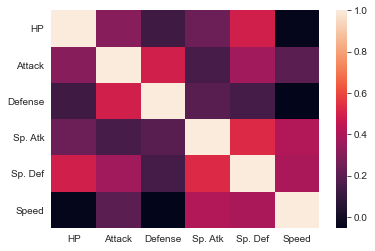

In [19]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

plt.savefig('snsheatmap')

### Histogram
Histograms allow you to plot the distributions of numeric variables.

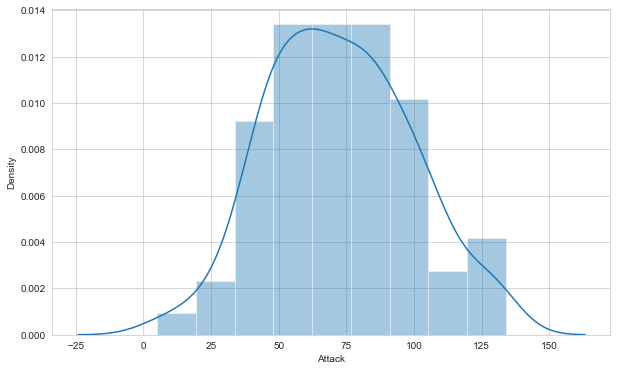

In [20]:
plt.figure(figsize=(10,6))

# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

plt.savefig('snshistogram')

### Bar plot
Bar plots help you visualize the distributions of categorical variables.

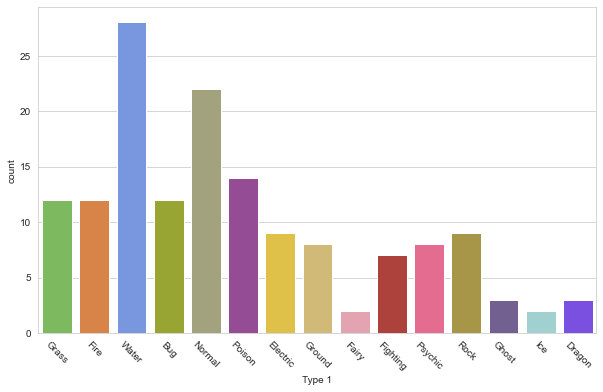

In [21]:
plt.figure(figsize=(10,6))

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

plt.savefig('snsbarplot')

### Factor Plot
Factor plots make it easy to separate plots by categorical classes.

<Figure size 720x432 with 0 Axes>

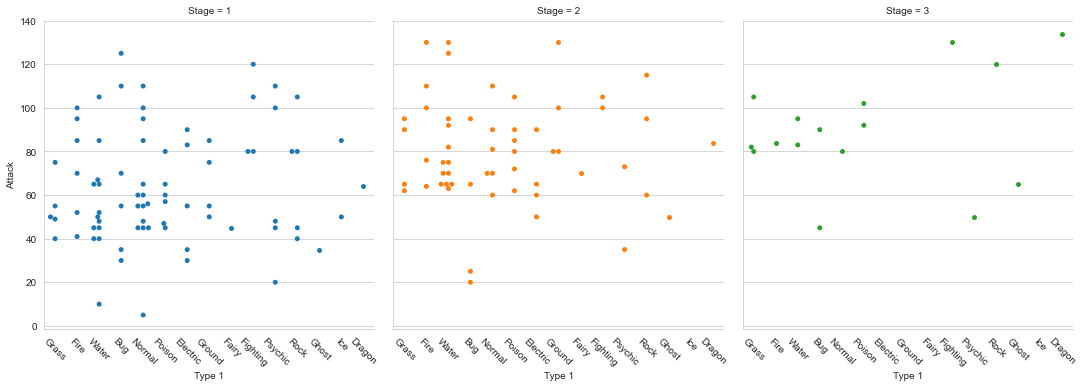

In [22]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

plt.savefig('snsfactorplot3')

### Density Plot
Density plots display the distribution between two variables.

*Tip: Consider overlaying this with a scatter plot.*


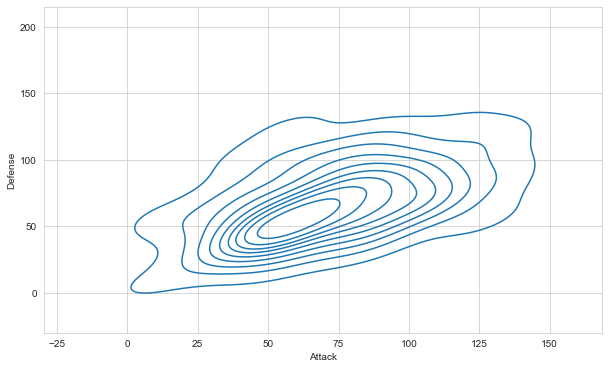

In [23]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Density Plot
sns.kdeplot(df.Attack, df.Defense)

plt.savefig('snsdesnityplot')

### Joint Distribution Plot
Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.

<Figure size 720x432 with 0 Axes>

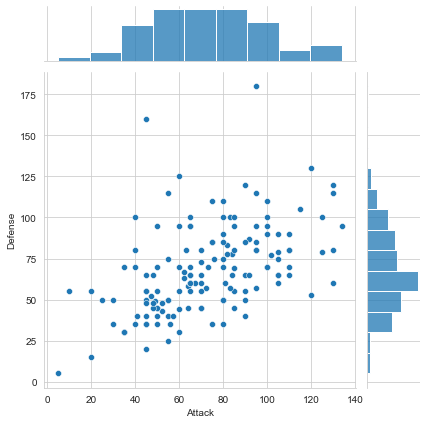

In [24]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

plt.savefig('snsjointdistrplot')

## Appendix

### Style

Define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.

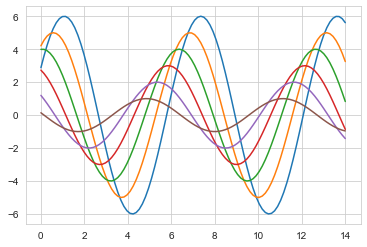

In [25]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

plt.savefig('snsrandomdata')

Reset style theme

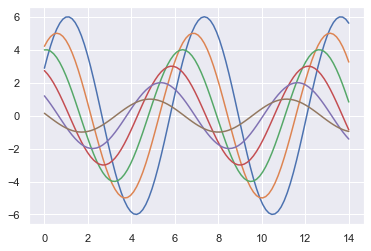

In [26]:
# To switch to seaborn defaults, simply call the set_theme() function.
sns.set_theme()
sinplot()


Background style

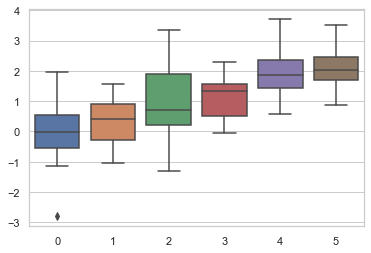

In [27]:
# background white with a grid
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

plt.savefig('snsgrid')

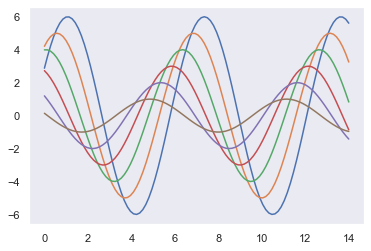

In [28]:
# background dark without grid
sns.set_style("dark")
sinplot()

plt.savefig('snsblack')

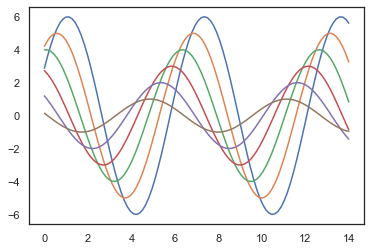

In [29]:
sns.set_style("white")
sinplot()

plt.savefig('snswhite')

Axes Lines

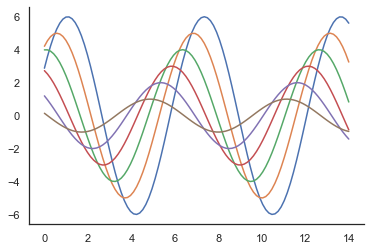

In [30]:
# removing the top and right axes spines, which are not needed. The seaborn function despine() can be called to remove them
sinplot()
sns.despine() # it only works after the graph

plt.savefig('snsaxis1')

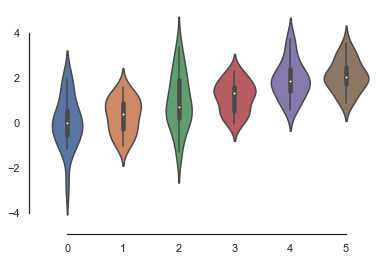

In [31]:
# only two lines as exes
f, ax = plt.subplots()
sns.violinplot(data=data)

sns.despine(offset=10, trim=True);

plt.savefig('snsaxis2')

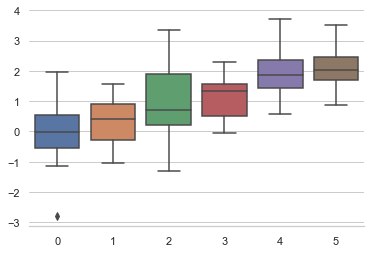

In [32]:
#remove all the exes lines 
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

plt.savefig('snsaxis3')

### Temporarily setting figure style

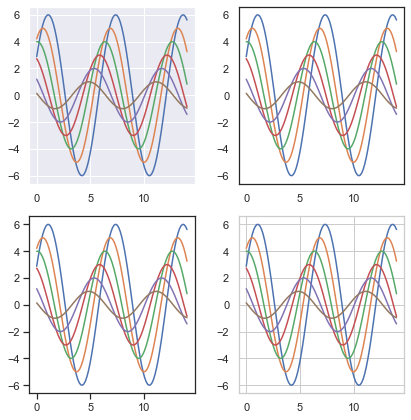

In [33]:
# Although it’s easy to switch back and forth, you can also use the axes_style() function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot()

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot()

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()

f.tight_layout()

plt.savefig('snstempsetting')

### Overriding elements of the seaborn styles

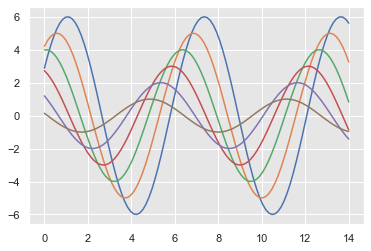

In [34]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

plt.savefig('snsoverriding')

### Scaling plot elements

The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default, and was used in the plots above.

In [35]:
# First let’s reset the default parameters by calling set_theme():
sns.set_theme()

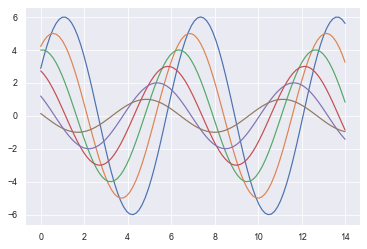

In [36]:
sns.set_context("paper")
sinplot()

plt.savefig('snstpaper')

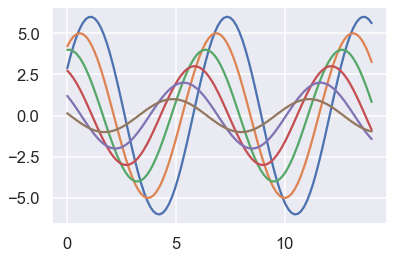

In [37]:
sns.set_context("talk")
sinplot()

plt.savefig('snsttalk')

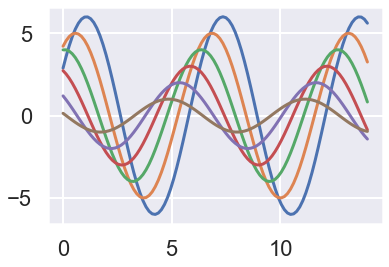

In [38]:
sns.set_context("poster")
sinplot()

plt.savefig('snstposter')

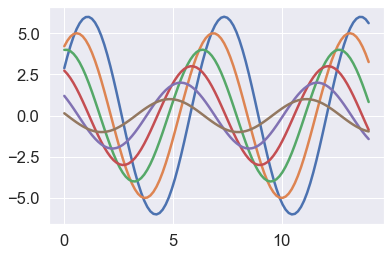

In [39]:
# independently scale the size of the font elements when changing the context
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

plt.savefig('snstnotebook')